In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2
from residual import ResidualComp, ResidualStat

In [3]:
dic = {'LCDM':{'params':['H0','Omega_m'],'datafile':['Chains/PantheonPlus_LCDM.h5','Chains/PantheonOld_LCDM.h5','Chains/PantheonPlusQSO_LCDM.h5']},
      'wCDM':{'params':['H0','Omega_m','w0'],'datafile':['Chains/PantheonPlus_wCDM.h5','Chains/PantheonOld_wCDM.h5','Chains/PantheonPlusQSO_wCDM.h5']},
      'CPL':{'params':['H0','Omega_m','w0','wa'],'datafile':['Chains/PantheonPlus_CPL.h5','Chains/PantheonOld_CPL.h5','Chains/PantheonPlusQSO_CPL.h5']},
      'kLCDM':{'params':['H0','Omega_m','Omega_k'],'datafile':['Chains/PantheonPlus_kLCDM.h5','Chains/PantheonOld_kLCDM.h5','Chains/PantheonPlusQSO_kLCDM.h5']}}

In [59]:
Res = ResidualStat("LCDM",['H0','Omega_m'],'Chains/PantheonOld_LCDM.h5',data='Pantheon_plus')

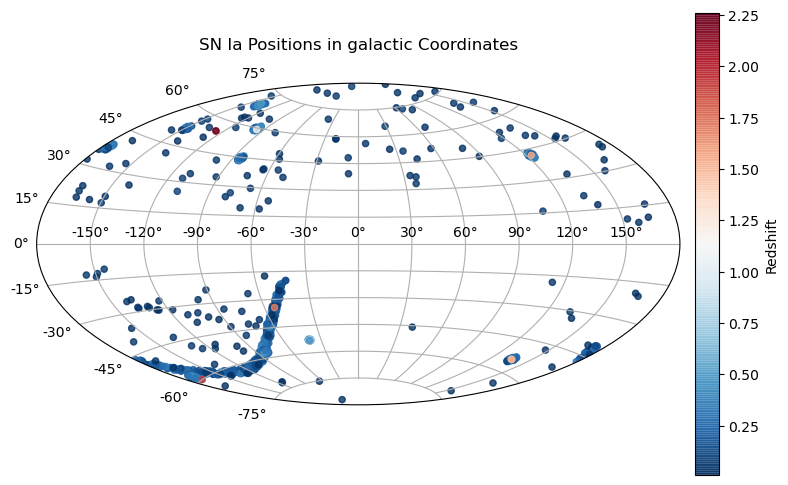

In [40]:
Res.plot_dist('SN')

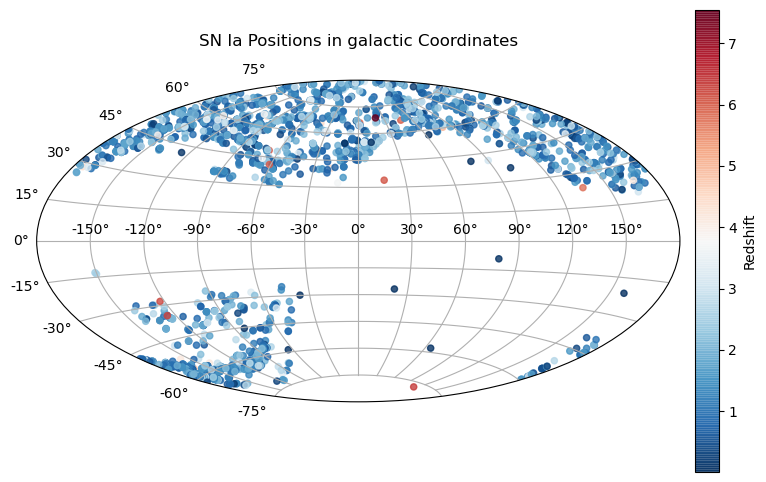

In [8]:
Res.plot_dist('QSO')

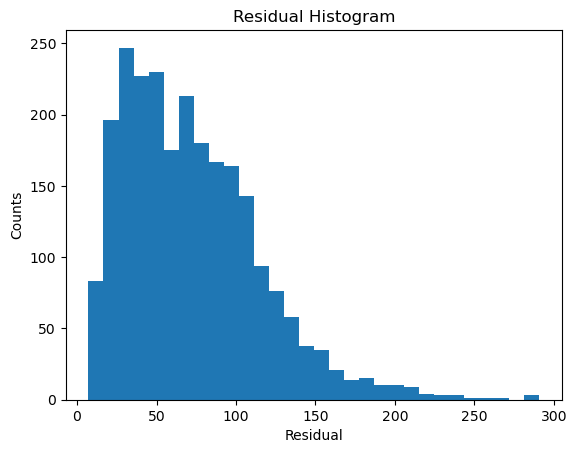

In [12]:
Res.plot_residual_hist('QSO')

In [13]:
import healpy as hp

In [60]:
ma = Res.get_residual_map('SN')

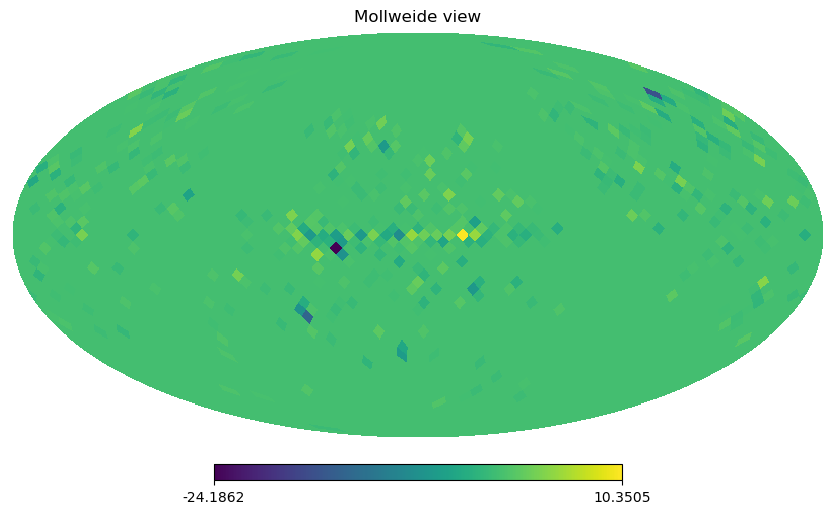

In [61]:
hp.mollview(ma)

In [41]:
cls = Res.get_residual_cls_mc(1000,which='SN')

Monte Carlo Samples: 1001samples [00:10, 91.77samples/s]                     


In [57]:
cl = Res.get_residual_cls('SN')

In [62]:
cl2 = Res.get_residual_cls('SN')

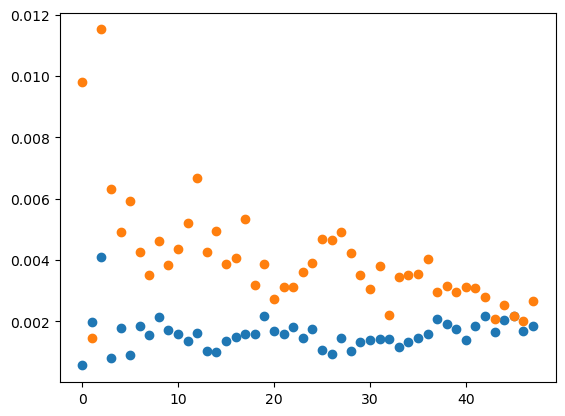

In [63]:

plt.scatter(np.arange(Res.lmax+1),cl)
plt.scatter(np.arange(Res.lmax+1),cl2)